In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2
# Set-up variables


In [2]:

home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# load metadata
metadata = pd.read_csv("stp_metadata.csv")

# STeg

In [3]:
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)

working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAc
working on aud
working on TH
working on STR
working on CP
working on AMY
working on P
working on PG
working on MB
working on PAG
working on SCm
working on SNr
working on HY
working on CNU
working on TEa
working on ECT
working on VISC
working on AI
working on GU
working on BS
working on HIP


In [6]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/STeg_220429_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))

loading: OMC_STeg_220208_b0
loading: OMC_STeg_220411_b1
loading: OMC_STeg_220429_b2


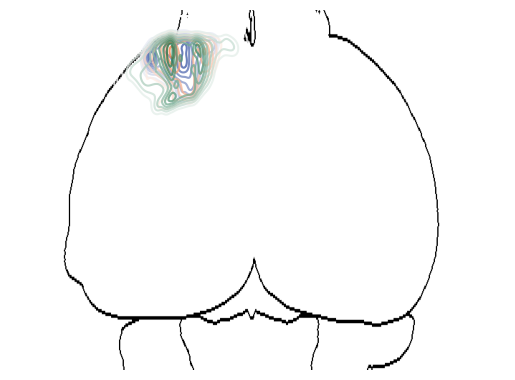

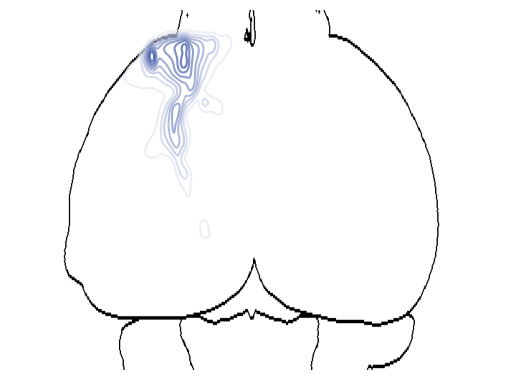

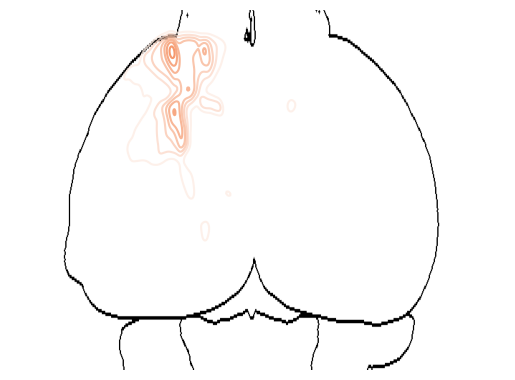

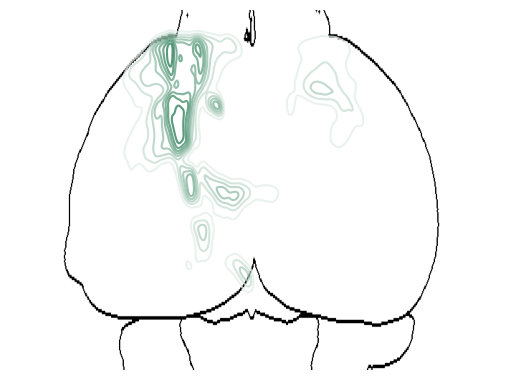

In [8]:

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.savefig(out_path+"steg_omc_contours_top.jpeg", dpi=300, bbox_inches="tight")
plt.show()

colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")
    plt.show()

loading: ACC_STeg_230308_b1
loading: ACC_STeg_230322_b2
loading: ACC_STeg_230501_b3


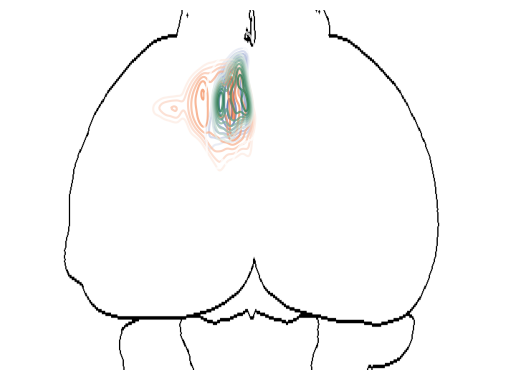

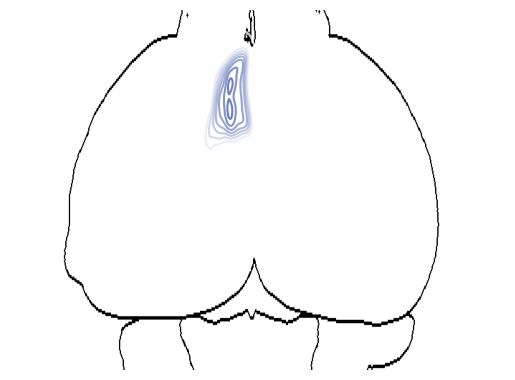

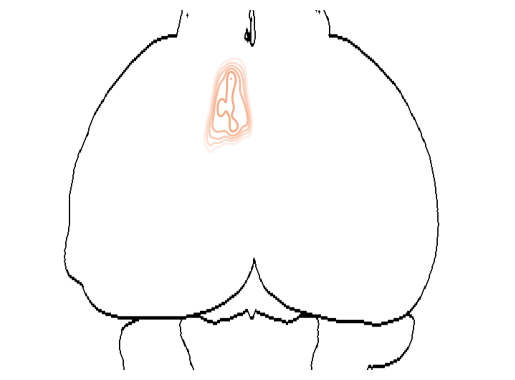

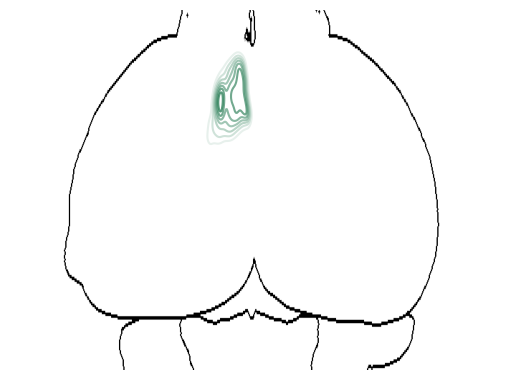

In [10]:
# load STeg/ACC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "ACC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/STeg_220429_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.savefig(out_path+"steg_acc_contours_top.jpeg", dpi=300, bbox_inches="tight")
plt.show()

colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")
    plt.show()

# MMus

In [20]:
# import masks from allen_mmus_220303_straight_asr
masks_folder = in_path+"masks/mmus_220303_hs_asr/"

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi" "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]

# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"mmus_220303_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)


working on grey
working on CTX
working on OMCi
working on OMCc
working on ACAiACAc


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/masks/mmus_220303_hs_asr/mmus_220303_hs_asr_ACAiACAc.npy'

In [12]:

# load MMus/OMC brains
# aligned to MMus_220303 hand straight asr
sp = "MMus"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/MMus_220303_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_MMus_220303_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))


loading: OMC_MMus_220119_b0
loading: OMC_MMus_220303_b1
loading: OMC_MMus_220324_b2


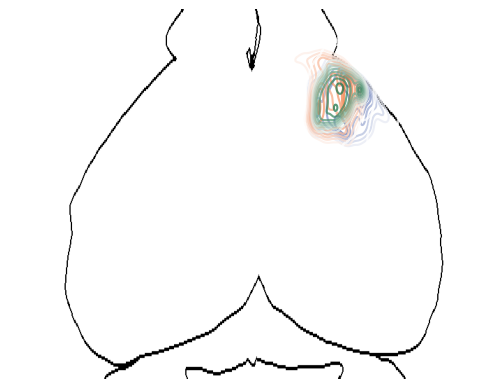

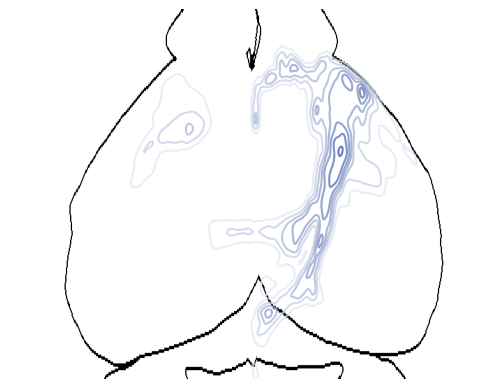

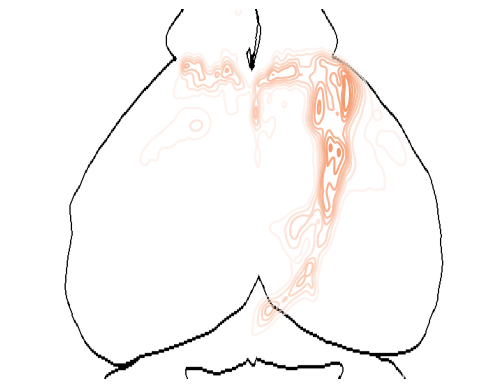

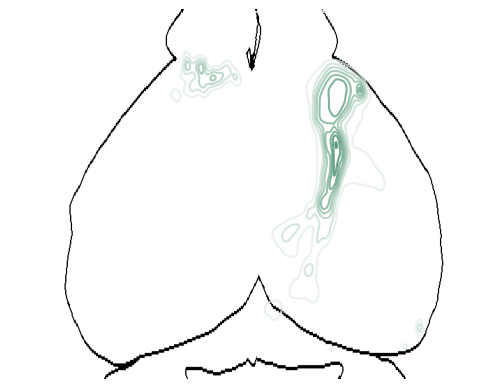

In [13]:

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.savefig(out_path+"mmus_omc_contours_top.jpeg", dpi=300, bbox_inches="tight")
plt.show()

colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")
    plt.show()


In [18]:

# load MMus/ACC brains
# aligned to MMus_220303 hand straight asr
sp = "MMus"
inj = "ACC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/MMus_220303_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_MMus_220303_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))


loading: ACC_MMus_230403_b1
loading: ACC_MMus_230404_b2
loading: ACC_MMus_230427_b3


In [21]:

im_thr = [threshold_otsu(im) for im in images]
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
masks['inj'] = [masks['inj_thr'][i] & masks['ACAi'] for i in range(len(images))] # bitwise operator



plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], view="top")
plt.savefig(out_path+"mmus_acc_contours_top.jpeg", dpi=300, bbox_inches="tight")
plt.show()

colors = [blue_cmp, orange_cmp, green_cmp]

for i in range(len(images)):
    plot_contour([images[i]], mask_dict=masks, masks_to_plot=["grey", "BS", "STR", "CP", "CTX"],
                 cmaps=[colors[i]], view="top")
    plt.show()

KeyError: 'ACAi'